In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


1. IMPORTING LIBRARIES

2. LOADING DATA

3. DATA EXPLORATION

3.1 FEATURE ENGINEERING
3.2 OUTLIER DETECTION
4. DATA PREPREPROCESSING

4.1 CLEANING TEXT
4.2 TOKENIZATION
4.3 REMOVING STOPWORDS
4.4 LEMMATIZATION
5. VECTORIZATION

6. MODEL BUILDING

7. EVALUATING MODELS

8. END

In [ ]:
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics

In [ ]:
#Loading data
data = pd.read_excel('1000 data dongeng.xlsx', header=None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
data.rename(columns = {0 : 'kalimat dongeng', 1 : 'label'}, inplace = True)
data

,kalimat dongeng,label
0,"Ketika kedua kalinya sang ibu menghampirinya, ...",marah
1,Pangeran Empang Kuala murka mendengar pinangan...,marah
2,Bujang Kelana akan menantang Pendekar Katung u...,marah
3,Pendekar Katung yang tidak terima dengan kekal...,marah
4,Ibunya sangat marah. ‘’ Dasar bodoh! Baju kesa...,marah
...,...,...
995,"Akan tetapi, ia dan rombongan terkejut sebab d...",terkejut
996,"Mendengar hal itu, Halimah sangat kaget dan te...",terkejut
997,Ketika aku memperhatikan domba-domba yang seda...,terkejut
998,Pada suatu hari beliau duduk di gua Hira dan t...,terkejut


Text(0, 0.5, 'Number of Data points')

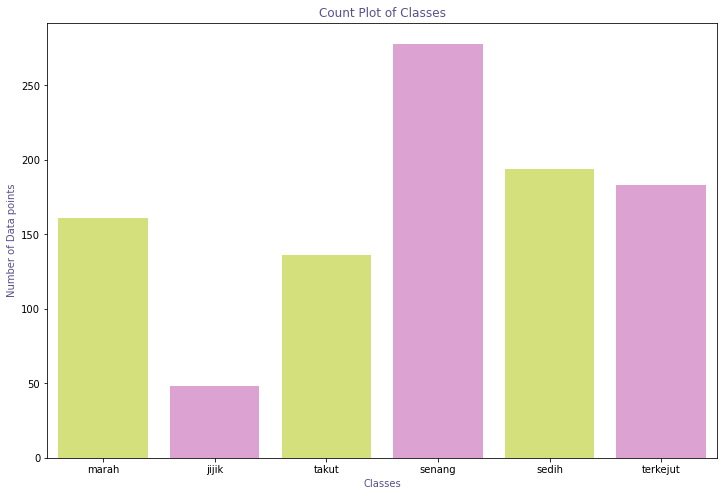

In [ ]:
cols= ["#E1F16B", "#E598D8"] 
plt.figure(figsize=(12,8))
fg = sns.countplot(x= data["label"], palette= cols)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

In [ ]:
#Adding a column of numbers of charachters,words and sentences in each msg
data["No_of_Characters"] = data["kalimat dongeng"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["kalimat dongeng"]), axis=1).apply(len)
data["No_of_sentence"]=data.apply(lambda row: nltk.sent_tokenize(row["kalimat dongeng"]), axis=1).apply(len)

data.describe().T

,count,mean,std,min,25%,50%,75%,max
No_of_Characters,1000.0,86.306,36.188617,24.0,60.75,80.0,106.0,293.0
No_of_Words,1000.0,14.374,6.063901,4.0,10.00,13.0,18.0,52.0
No_of_sentence,1000.0,1.281,0.590243,1.0,1.00,1.0,1.0,5.0


<Figure size 864x576 with 0 Axes>

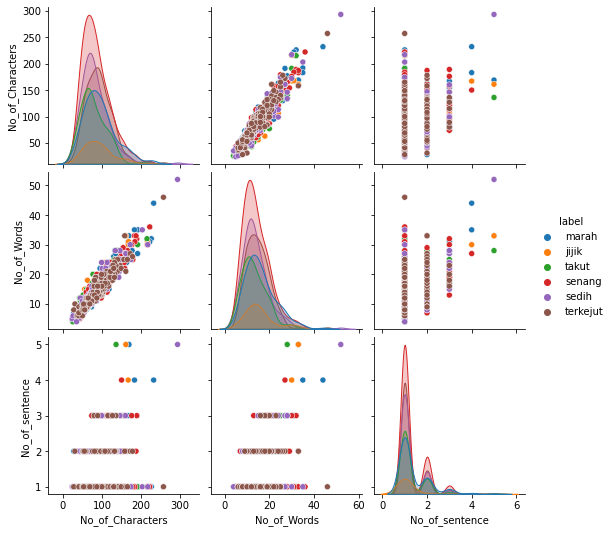

In [ ]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="label")
plt.show(fg)

In [ ]:
data.shape

(1000, 5)

DATA PREPROCESSING

In [ ]:
#Print 5 text pertama sebelum proses cleaning
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*data["kalimat dongeng"][:5], sep = "\n")

 The First 5 Texts:
Ketika kedua kalinya sang ibu menghampirinya, Sang Putri justru membentak ibunya.
Pangeran Empang Kuala murka mendengar pinangannya ditolak.
Bujang Kelana akan menantang Pendekar Katung untuk menyabung ayam.
Pendekar Katung yang tidak terima dengan kekalahannya memerintahkan pengawalnya untuk mengejar Bujang Kelana.
Ibunya sangat marah. ‘’ Dasar bodoh! Baju kesayanganku itu harganya sangat mahal.


In [ ]:
# Defining fungsi untuk cleaning teks
def Clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text) 
    sms = sms.lower()
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

data["Clean_Text"] = data["kalimat dongeng"].apply(Clean)

print("\033[1m\u001b[45;1m The First 5 Texts after cleaning:\033[0m",*data["Clean_Text"][:5], sep = "\n")

 The First 5 Texts after cleaning:
ketika kedua kalinya sang ibu menghampirinya sang putri justru membentak ibunya
pangeran empang kuala murka mendengar pinangannya ditolak
bujang kelana akan menantang pendekar katung untuk menyabung ayam
pendekar katung yang tidak terima dengan kekalahannya memerintahkan pengawalnya untuk mengejar bujang kelana
ibunya sangat marah dasar bodoh baju kesayanganku itu harganya sangat mahal


In [ ]:
data["Tokenize_Text"]=data.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m",*data["Tokenize_Text"][:5], sep = "\n")

 The First 5 Texts after Tokenizing:
['ketika', 'kedua', 'kalinya', 'sang', 'ibu', 'menghampirinya', 'sang', 'putri', 'justru', 'membentak', 'ibunya']
['pangeran', 'empang', 'kuala', 'murka', 'mendengar', 'pinangannya', 'ditolak']
['bujang', 'kelana', 'akan', 'menantang', 'pendekar', 'katung', 'untuk', 'menyabung', 'ayam']
['pendekar', 'katung', 'yang', 'tidak', 'terima', 'dengan', 'kekalahannya', 'memerintahkan', 'pengawalnya', 'untuk', 'mengejar', 'bujang', 'kelana']
['ibunya', 'sangat', 'marah', 'dasar', 'bodoh', 'baju', 'kesayanganku', 'itu', 'harganya', 'sangat', 'mahal']


In [ ]:
# Removing the stopwords function
#def remove_stopwords(text):
#    stop_words = set(stopwords.words("english"))
#    filtered_text = [word for word in text if word not in stop_words]
#    return filtered_text

#data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)

#print("\033[1m\u001b[45;1m The First 5 Texts after removing the stopwords:\033[0m",*data["Nostopword_Text"][:5], sep = "\n")

In [ ]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

data["Lemmatized_Text"] = data["Tokenize_Text"].apply(lemmatize_word)
print("\033[1m\u001b[45;1m The First 5 Texts after lemitization:\033[0m",*data["Lemmatized_Text"][:5], sep = "\n")

 The First 5 Texts after lemitization:
['ketika', 'kedua', 'kalinya', 'sing', 'ibu', 'menghampirinya', 'sing', 'putri', 'justru', 'membentak', 'ibunya']
['pangeran', 'empang', 'kuala', 'murka', 'mendengar', 'pinangannya', 'ditolak']
['bujang', 'kelana', 'akan', 'menantang', 'pendekar', 'katung', 'untuk', 'menyabung', 'ayam']
['pendekar', 'katung', 'yang', 'tidak', 'terima', 'dengan', 'kekalahannya', 'memerintahkan', 'pengawalnya', 'untuk', 'mengejar', 'bujang', 'kelana']
['ibunya', 'sangat', 'marah', 'dasar', 'bodoh', 'baju', 'kesayanganku', 'itu', 'harganya', 'sangat', 'mahal']


In [ ]:
corpus= []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)
    
corpus[:5]
print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m",*corpus[:5], sep = "\n")

 The First 5 lines in corpus :
ketika kedua kalinya sing ibu menghampirinya sing putri justru membentak ibunya
pangeran empang kuala murka mendengar pinangannya ditolak
bujang kelana akan menantang pendekar katung untuk menyabung ayam
pendekar katung yang tidak terima dengan kekalahannya memerintahkan pengawalnya untuk mengejar bujang kelana
ibunya sangat marah dasar bodoh baju kesayanganku itu harganya sangat mahal


In [ ]:
#Mengubah data teks menjadi angka
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

X.shape

dtype('float64')

In [ ]:
label_encoder = LabelEncoder()
data["label"] = label_encoder.fit_transform(data["label"])

In [ ]:
y = data["label"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Testing dengan beberapa classifier
classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)

pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}

In [ ]:
# Crossvalidation 
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.532500 
RandomForest: 0.768750 
KNeighbours: 0.575000 
SVC: 0.672500 


In [ ]:
# Model Evaluation
# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test, average='micro')
    recal = metrics.recall_score(y_test, pred_test, average='micro')
    f1_s = metrics.f1_score(y_test, pred_test, average='micro')
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)


In [ ]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1 score':f1_score,
'Accuracy on Test set':testset_accuracy,
'Accuracy on Train set':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC"])

In [ ]:
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1 score,Accuracy on Test set,Accuracy on Train set
NaiveBayes,0.515000,0.515000,0.515000,0.715000,1.000000
RandomForest,0.790000,0.790000,0.790000,0.715000,1.000000
KNeighbours,0.560000,0.560000,0.560000,0.715000,1.000000
SVC,0.715000,0.715000,0.715000,0.715000,1.000000


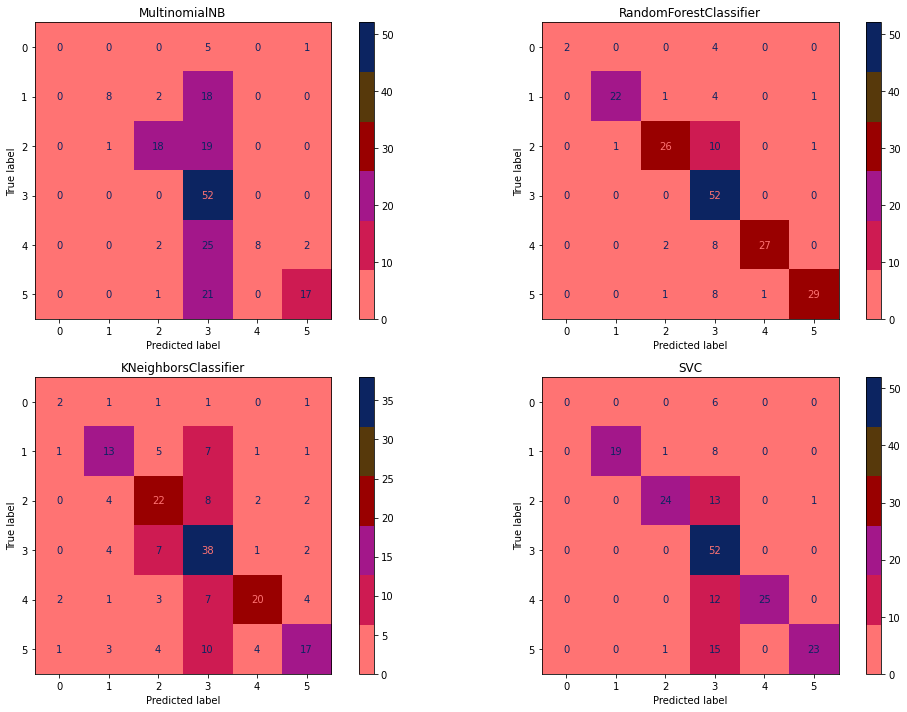

In [ ]:
cmap = ListedColormap(['#ff7373','#ce1b52','#a3178a','#990000','#57390b','#0c2461'])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap= cmap,
                          )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [ ]:
RF_class = RandomForestClassifier()
RF_class.fit(X_train,y_train)
Y_pred_RF = RF_class.predict(X_test)

In [ ]:
print(classification_report(Y_pred_RF,y_test))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.79      0.92      0.85        24
           2       0.71      0.96      0.82        28
           3       1.00      0.60      0.75        86
           4       0.73      0.96      0.83        28
           5       0.72      0.93      0.81        30

    accuracy                           0.80       200
   macro avg       0.74      0.86      0.78       200
weighted avg       0.84      0.80      0.79       200



In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
Y_pred_nb = nb.predict(X_test)

In [ ]:
print(classification_report(Y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.29      0.89      0.43         9
           2       0.47      0.78      0.59        23
           3       1.00      0.37      0.54       140
           4       0.22      1.00      0.36         8
           5       0.44      0.85      0.58        20

    accuracy                           0.52       200
   macro avg       0.40      0.65      0.42       200
weighted avg       0.82      0.52      0.54       200



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
